In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Ecuación Calor

In [1]:
import matplotlib.animation as animation

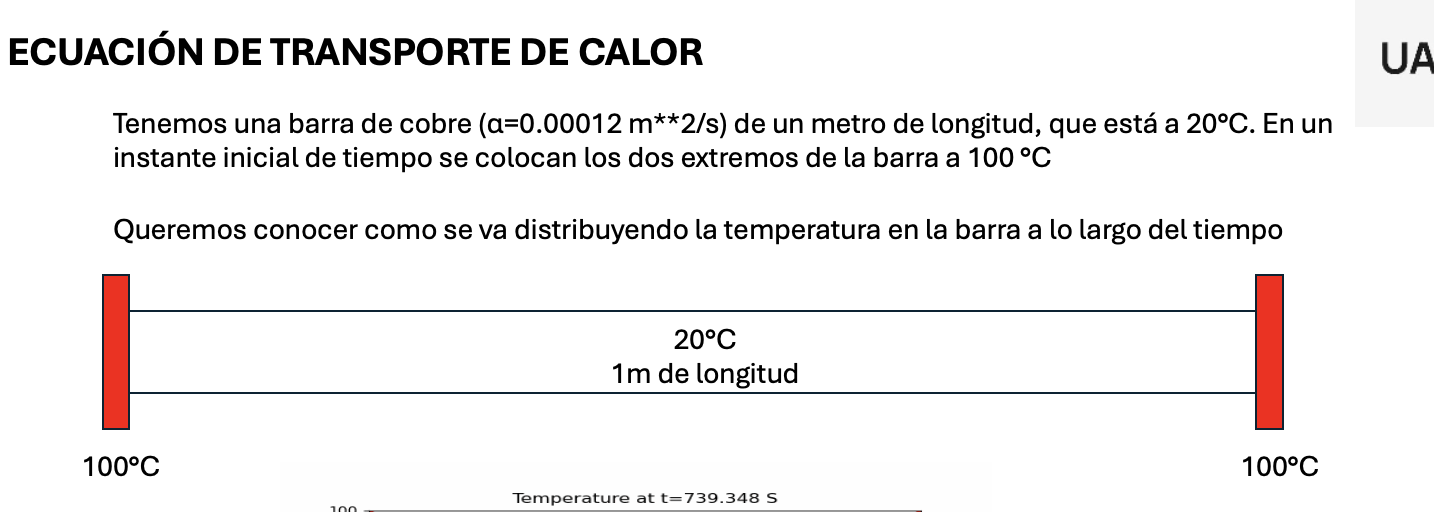

## **Explicación Completa**

 **1. Planteamiento del Problema**.

La ecuación que modela este fenómeno es la **ecuación de difusión de calor en una dimensión**:

$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
$

Donde:
- $ T(x,t)$ es la temperatura en la posición $ x$ y en el instante $t$.
- $alpha$ es la difusividad térmica del material 

**Condiciones iniciales y de frontera:**
- Condición inicial: $T(x, 0) = 20°C $ en toda la barra.
- Condiciones de frontera: $ T(0,t) = 100°$ y $ T(1,t) = 100°C$ para todo $ t$.


**2. Discretización por Diferencias Finitas**

Para resolver la ecuación numéricamente, discretizamos  la barra en N  puntos con un **espaciado $Delta x $** y el tiempo en pasos de $Delta t$.

Aproximamos las derivadas con diferencias finitas:

- **Derivada temporal (Diferencias hacia adelante)**:

$$
  \frac{\partial T}{\partial t} \approx \frac{T_i^{j+1} - T_i^j}{\Delta t}
$$

- **Derivada espacial (Diferencias centradas)**:

$$
  \frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1}^{j} - 2T_i^{j} + T_{i-1}^{j}}{\Delta x^2}
$$

Sustituyendo en la ecuación del calor:

$$
\frac{T_i^{j+1} - T_i^j}{\Delta t} = \alpha \frac{T_{i+1}^{j} - 2T_i^{j} + T_{i-1}^{j}}{\Delta x^2}
$$

Despejamos $ T_i^{j+1}$ (temperatura en el siguiente tiempo):

$$
T_i^{j+1} = \lambda T_{i+1}^{j} + (1 - 2\lambda) T_i^{j} + \lambda T_{i-1}^{j}
$$

donde:

$$
\lambda = \frac{\alpha \Delta t}{\Delta x^2}
$$

Este **método explícito** actualiza la temperatura en cada nodo usando los valores anteriores.



**3. Condición de Estabilidad**
Para que el método converja y no genere soluciones erróneas (oscilaciones o explosiones numéricas), debe cumplirse la **condición de estabilidad de Von Neumann**:

$$
0 \leq \lambda \leq \frac{1}{2}
$$

Es decir:

$$
\frac{\alpha \Delta t}{\Delta x^2} \leq \frac{1}{2}
$$



**Caso 1**

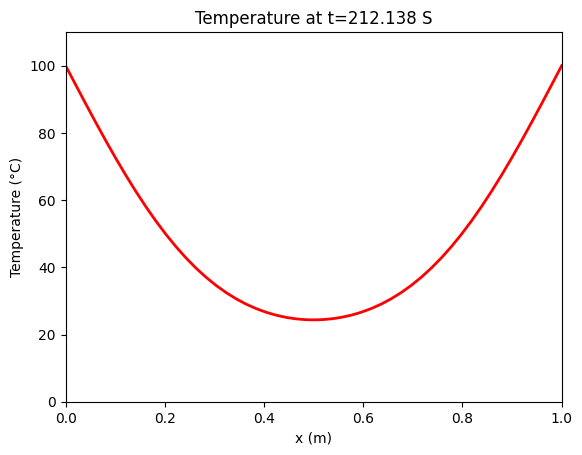

In [ ]:

# Parámetros del problema
L = 1.0  # Longitud de la barra (m)
alpha = 0.00012  # Difusividad térmica del cobre (m^2/s)
Nx = 100  # Número de puntos espaciales
Nt = 500  # Número de pasos de tiempo
dx = L / (Nx - 1)  # Tamaño del paso espacial
dt = 0.5 * dx**2 / alpha  # Paso de tiempo que cumple la condición de estabilidad

# Verificar la condición de estabilidad
lambda_ = alpha * dt / dx**2
assert lambda_ <= 0.5, "Condición de estabilidad no satisfecha, reduce dt o aumenta dx"

# Inicialización de la temperatura
T = np.ones(Nx) * 20  # Temperatura inicial en toda la barra
T[0] = 100  # Condición de frontera izquierda
T[-1] = 100  # Condición de frontera derecha

# Configurar la figura para la animación
fig, ax = plt.subplots()
x = np.linspace(0, L, Nx)
line, = ax.plot(x, T, 'r-', linewidth=2)
ax.set_xlim(0, L)
ax.set_ylim(0, 110)
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperature (°C)")
title = ax.set_title("Temperature at t=0.000 S")

# Función de actualización para la animación
def update(frame):
    global T
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = lambda_ * T[i + 1] + (1 - 2 * lambda_) * T[i] + lambda_ * T[i - 1]
    T = T_new
    line.set_ydata(T)
    title.set_text(f"Temperature at t={frame * dt:.3f} S")
    return line, title

# Crear animación
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=50, blit=True)

# Guardar la animación como GIF
ani.save("heat_diffusion.gif", writer=animation.PillowWriter(fps=20))

plt.show()

**Caso 2**
- $alpha = 0.001$
- $ T(0, t) = T(1, t) = 0$ (condiciones de frontera homogéneas)
- $T(x, 0) = 10 \cdot \sin(\pi x)$ (condición inicial)

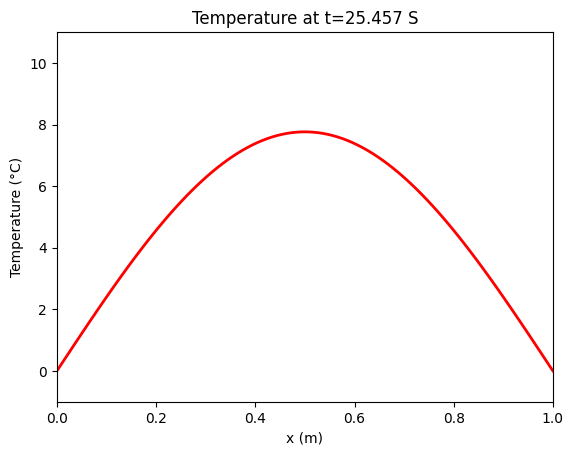

In [3]:
# Parámetros del problema
L = 1.0                  # Longitud de la barra (m)
alpha = 0.001            # Nueva difusividad térmica (m^2/s)
Nx = 100                 # Número de puntos espaciales
dx = L / (Nx - 1)        # Paso espacial
dt = 0.5 * dx**2 / alpha # Paso de tiempo que cumple la condición de estabilidad
Nt = 500                 # Número de pasos de tiempo

# Verificación de la condición de estabilidad
lambda_ = alpha * dt / dx**2
assert lambda_ <= 0.5, "Condición de estabilidad no satisfecha, reduce dt o aumenta dx"

# Discretización espacial
x = np.linspace(0, L, Nx)

# Condición inicial: T(x,0) = 10 * sin(pi * x)
T = 10 * np.sin(np.pi * x)

# Condiciones de frontera
T[0] = 0
T[-1] = 0

# Configurar la figura para la animación
fig, ax = plt.subplots()
line, = ax.plot(x, T, 'r-', linewidth=2)
ax.set_xlim(0, L)
ax.set_ylim(-1, 11)
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperature (°C)")
title = ax.set_title("Temperature at t=0.000 S")

# Función de actualización para la animación
def update(frame):
    global T
    T_new = T.copy()
    for i in range(1, Nx - 1):
        T_new[i] = lambda_ * T[i + 1] + (1 - 2 * lambda_) * T[i] + lambda_ * T[i - 1]
    T = T_new
    line.set_ydata(T)
    title.set_text(f"Temperature at t={frame * dt:.3f} S")
    return line, title

# Crear animación
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=50, blit=True)

# Guardar la animación como GIF
ani.save("heat_diffusion_alpha_sin.gif", writer=animation.PillowWriter(fps=20))

plt.show()